# Yaw's Transaction Data Project

## Introduction & Problem Definition

Fraudulent transactions represent a major financial challenge for banks. Developing an accurate fraud detection model can help reduce these costs while improving customer satisfaction by addressing fraud before it impacts the customer.

The objective of this project is to build a machine learning model capable of detecting fraudulent transactions in almost real-time, allowing banks to act proactively. Notably, only 1% of transactions in the dataset are fraudulent, which presents a <b> class imbalance </b> challenge that the model must address.

The dataset includes the following transaction details:
- **Transaction ID**: Unique identifier for each transaction
- **Transaction Time**: Timestamp of when the transaction occurred
- **Is Fraudulent**: Target variable indicating whether the transaction was fraudulent (1) or not (0)
- **Card Type**: Credit card used (MasterCard, Visa, Amex, Discover)
- **Location**: Transaction cities (New York, Chicago, San Francisco, Los Angeles, Boston)
- **Purchase Category**: Type of merchant (Gas Station, Online, Travel, Retail, Restaurant, Groceries)
- **Customer Age**: Age of the customer

---

## What This Model Showcases

This project demonstrates my proficiency in developing and refining machine learning models, including:
- Logistic regression, decision trees, random forest, and gradient boosting
- Data interpretation
- Iterative hyperparameter tuning to enhance model's discernment capability

Through data-driven problem-solving, I refined the model and significantly improved fraud detection performance, which is critical for reducing costs and enhancing customer satisfaction.

---

## Technical Results
While the logistic regression model achieved 99% accuracy, its precision and recall for detecting fraud were notably poor, with precision at 8% and recall at 50%. Having 99% accuracy isn't a big deal when 99% of the transactions are good and 1% are fradulent. The logistic regression's poor recall and precision makes logistic regression a poor model for this dataset.

I then tried a Classification Decision tree and random forest whcih both had 0% for recall or precision.

Lastly, I tried gradient boosting, and it consistently was able to detect fraud, almost 100% of the time, even after cross validating with different test sets.

The most refined model, using gradient boosting, achieved a average recall of 99.7% and average precison of 98.9% addressing the class imbalance and offering reliable fraud detection and discernment capabilities.

The 99.7% recall measures how well the model finds fraud out of all actual fraudulent transactions.
The 98.9% perecision demonstrates that the model is good at avoiding false positives (wrongly labeling legitimate transactions as fraud). 

## Stakeholder Insights

Executive: The best model's primary focus is on fraud detection, which is critical to maintaining user trust and preventing financial losses.The high performance of the model ensures our ability to meet that critical business need of maintaining customer trust and reduce costs on dealing with fraud, potentially saving the firm tens of millions annually.

Product/Marketing: The importance of this high performing, high discerning model is that Improving the model's precision reduces the number of legitimate users flagged for fraud, improving overall user trust and retention.

Engineering: The Gradient Boost Model performs well, however due to the fact that Gradient XGBoost models are built for batch processing as opposed to real time streaming, this model doesn't yet meet the business requirement for near real time fraud detection. More work will need to be done to bridge that gap by using solutions more applicable to real time ML detechtion like Apache Kafla.



<h1><b> Import Libaries </b></h1>

In [1169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing



filterwarnings("ignore")

<h1><b> Get the Data </b></h1>


In [1171]:
fin_data = pd.read_csv('Transaction_Data.csv') #read the dataset

In [1172]:
fin_data.head() #get first 5 rows

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1461,2172,7120.42,2023-05-22 00:12:00,0,Discover,Boston,Pharmacy,24,Purchase at Merchant-2172
1,2,1824,2095,6912.25,2023-04-26 19:18:00,0,MasterCard,Los Angeles,Pharmacy,64,Purchase at Merchant-2095
2,3,1493,2243,7184.92,2023-11-15 04:58:00,0,MasterCard,Chicago,Grocery Store,39,Purchase at Merchant-2243
3,4,1011,2560,4170.23,2023-10-08 11:40:00,0,Visa,Los Angeles,Restaurant,58,Purchase at Merchant-2560
4,5,1952,2797,1413.39,2023-12-10 22:07:00,0,Discover,Chicago,Gas Station,21,Purchase at Merchant-2797


In [1173]:
#info on the dataset such as null count, data type (int, float, object)
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           1000 non-null   int64  
 1   customer_id              1000 non-null   int64  
 2   merchant_id              1000 non-null   int64  
 3   amount                   1000 non-null   float64
 4   transaction_time         1000 non-null   object 
 5   is_fraudulent            1000 non-null   int64  
 6   card_type                1000 non-null   object 
 7   location                 1000 non-null   object 
 8   purchase_category        1000 non-null   object 
 9   customer_age             1000 non-null   int64  
 10  transaction_description  1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


<h3><b>Understanding our Data</b></h3>
    
<ul>
    <li><b>Most data are integers/floats except card_type, location, purchase_category, and transaction_description</b></li>
</ul>

In [1175]:
fin_data_obj = fin_data.select_dtypes("object")

In [1176]:
fin_data_obj

,transaction_time,card_type,location,purchase_category,transaction_description
0,2023-05-22 00:12:00,Discover,Boston,Pharmacy,Purchase at Merchant-2172
1,2023-04-26 19:18:00,MasterCard,Los Angeles,Pharmacy,Purchase at Merchant-2095
2,2023-11-15 04:58:00,MasterCard,Chicago,Grocery Store,Purchase at Merchant-2243
3,2023-10-08 11:40:00,Visa,Los Angeles,Restaurant,Purchase at Merchant-2560
4,2023-12-10 22:07:00,Discover,Chicago,Gas Station,Purchase at Merchant-2797
...,...,...,...,...,...
995,2023-10-10 15:56:00,Discover,Boston,Pharmacy,Purchase at Merchant-2439
996,2023-08-19 04:57:00,Discover,Chicago,Pharmacy,Purchase at Merchant-2207
997,2023-11-14 03:20:00,Discover,Boston,Restaurant,Purchase at Merchant-2451
998,2023-07-17 14:52:00,Visa,Los Angeles,Online Shopping,Purchase at Merchant-2539


**Seeing how many transactions are fraudulent: 1%**


In [1178]:
fraud_percentage = fin_data['is_fraudulent'].mean() * 100 #fraud count 

# Print the result
print(f"Percentage of fraudulent transactions: {fraud_percentage:.3f}%")

Percentage of fraudulent transactions: 1.000%


In [1179]:
fin_data_int = fin_data.select_dtypes("int64") #seeing which pieces of data are integers

In [1180]:
fin_data_int

,transaction_id,customer_id,merchant_id,is_fraudulent,customer_age
0,1,1461,2172,0,24
1,2,1824,2095,0,64
2,3,1493,2243,0,39
3,4,1011,2560,0,58
4,5,1952,2797,0,21
...,...,...,...,...,...
995,996,1823,2439,0,54
996,997,1077,2207,0,40
997,998,1725,2451,0,67
998,999,1818,2539,0,58


In [1181]:
fin_data.describe().T #transposing the original dataframe

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,500.50000,288.819436,1.00,250.75,500.500,750.2500,1000.00
customer_id,1000.0,1497.64000,289.763896,1000.00,1252.00,1495.500,1747.0000,2000.00
merchant_id,1000.0,2517.86400,286.618691,2001.00,2281.25,2509.000,2764.2500,3000.00
amount,1000.0,5066.79002,2858.747890,13.53,2639.46,5000.335,7558.2575,9988.84
is_fraudulent,1000.0,0.01000,0.099549,0.00,0.00,0.000,0.0000,1.00
customer_age,1000.0,47.47500,16.868667,18.00,34.00,48.000,62.2500,75.00


In [1182]:
fin_data_obj.describe().T #looking at the data frame's objects, transposed

,count,unique,top,freq
transaction_time,1000,999,2023-07-16 23:58:00,2
card_type,1000,4,Discover,264
location,1000,5,New York,233
purchase_category,1000,5,Online Shopping,219
transaction_description,1000,624,Purchase at Merchant-2463,6


In [1183]:
fin_data_int.describe().T #looking at the integer dataset transposed

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
customer_id,1000.0,1497.640,289.763896,1000.0,1252.00,1495.5,1747.00,2000.0
merchant_id,1000.0,2517.864,286.618691,2001.0,2281.25,2509.0,2764.25,3000.0
is_fraudulent,1000.0,0.010,0.099549,0.0,0.00,0.0,0.00,1.0
customer_age,1000.0,47.475,16.868667,18.0,34.00,48.0,62.25,75.0


<h1><b> Date Check </b></h1>
<h2><b> Checking Nulls: No Nulls! and No duplicates!</h2>

In [1185]:
fin_data.isnull().sum() # checking nulls

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

<h2><b> Checking Duplicatess</h2>

In [1187]:
check_duplicates = fin_data.duplicated().any() #checking duplicates
check_duplicates #there are none as seen with the "false" statement

False

In [1188]:
fin_data

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1461,2172,7120.42,2023-05-22 00:12:00,0,Discover,Boston,Pharmacy,24,Purchase at Merchant-2172
1,2,1824,2095,6912.25,2023-04-26 19:18:00,0,MasterCard,Los Angeles,Pharmacy,64,Purchase at Merchant-2095
2,3,1493,2243,7184.92,2023-11-15 04:58:00,0,MasterCard,Chicago,Grocery Store,39,Purchase at Merchant-2243
3,4,1011,2560,4170.23,2023-10-08 11:40:00,0,Visa,Los Angeles,Restaurant,58,Purchase at Merchant-2560
4,5,1952,2797,1413.39,2023-12-10 22:07:00,0,Discover,Chicago,Gas Station,21,Purchase at Merchant-2797
...,...,...,...,...,...,...,...,...,...,...,...
995,996,1823,2439,2946.16,2023-10-10 15:56:00,0,Discover,Boston,Pharmacy,54,Purchase at Merchant-2439
996,997,1077,2207,424.77,2023-08-19 04:57:00,0,Discover,Chicago,Pharmacy,40,Purchase at Merchant-2207
997,998,1725,2451,2378.60,2023-11-14 03:20:00,0,Discover,Boston,Restaurant,67,Purchase at Merchant-2451
998,999,1818,2539,2844.82,2023-07-17 14:52:00,0,Visa,Los Angeles,Online Shopping,58,Purchase at Merchant-2539


<h1><b> Removing Unneeded variables </b></h1>


In [1190]:
fin_data = fin_data.drop(['transaction_id','customer_id','merchant_id','transaction_description'],axis=1) #dropping variables

I dropped the unique identifiers because IDs don't produce useful information for classifying data. The text fields won't be useful either

In [1192]:
fin_data

,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age
0,7120.42,2023-05-22 00:12:00,0,Discover,Boston,Pharmacy,24
1,6912.25,2023-04-26 19:18:00,0,MasterCard,Los Angeles,Pharmacy,64
2,7184.92,2023-11-15 04:58:00,0,MasterCard,Chicago,Grocery Store,39
3,4170.23,2023-10-08 11:40:00,0,Visa,Los Angeles,Restaurant,58
4,1413.39,2023-12-10 22:07:00,0,Discover,Chicago,Gas Station,21
...,...,...,...,...,...,...,...
995,2946.16,2023-10-10 15:56:00,0,Discover,Boston,Pharmacy,54
996,424.77,2023-08-19 04:57:00,0,Discover,Chicago,Pharmacy,40
997,2378.60,2023-11-14 03:20:00,0,Discover,Boston,Restaurant,67
998,2844.82,2023-07-17 14:52:00,0,Visa,Los Angeles,Online Shopping,58


<h1><b> Exploratory Data Analysis </b></h1>


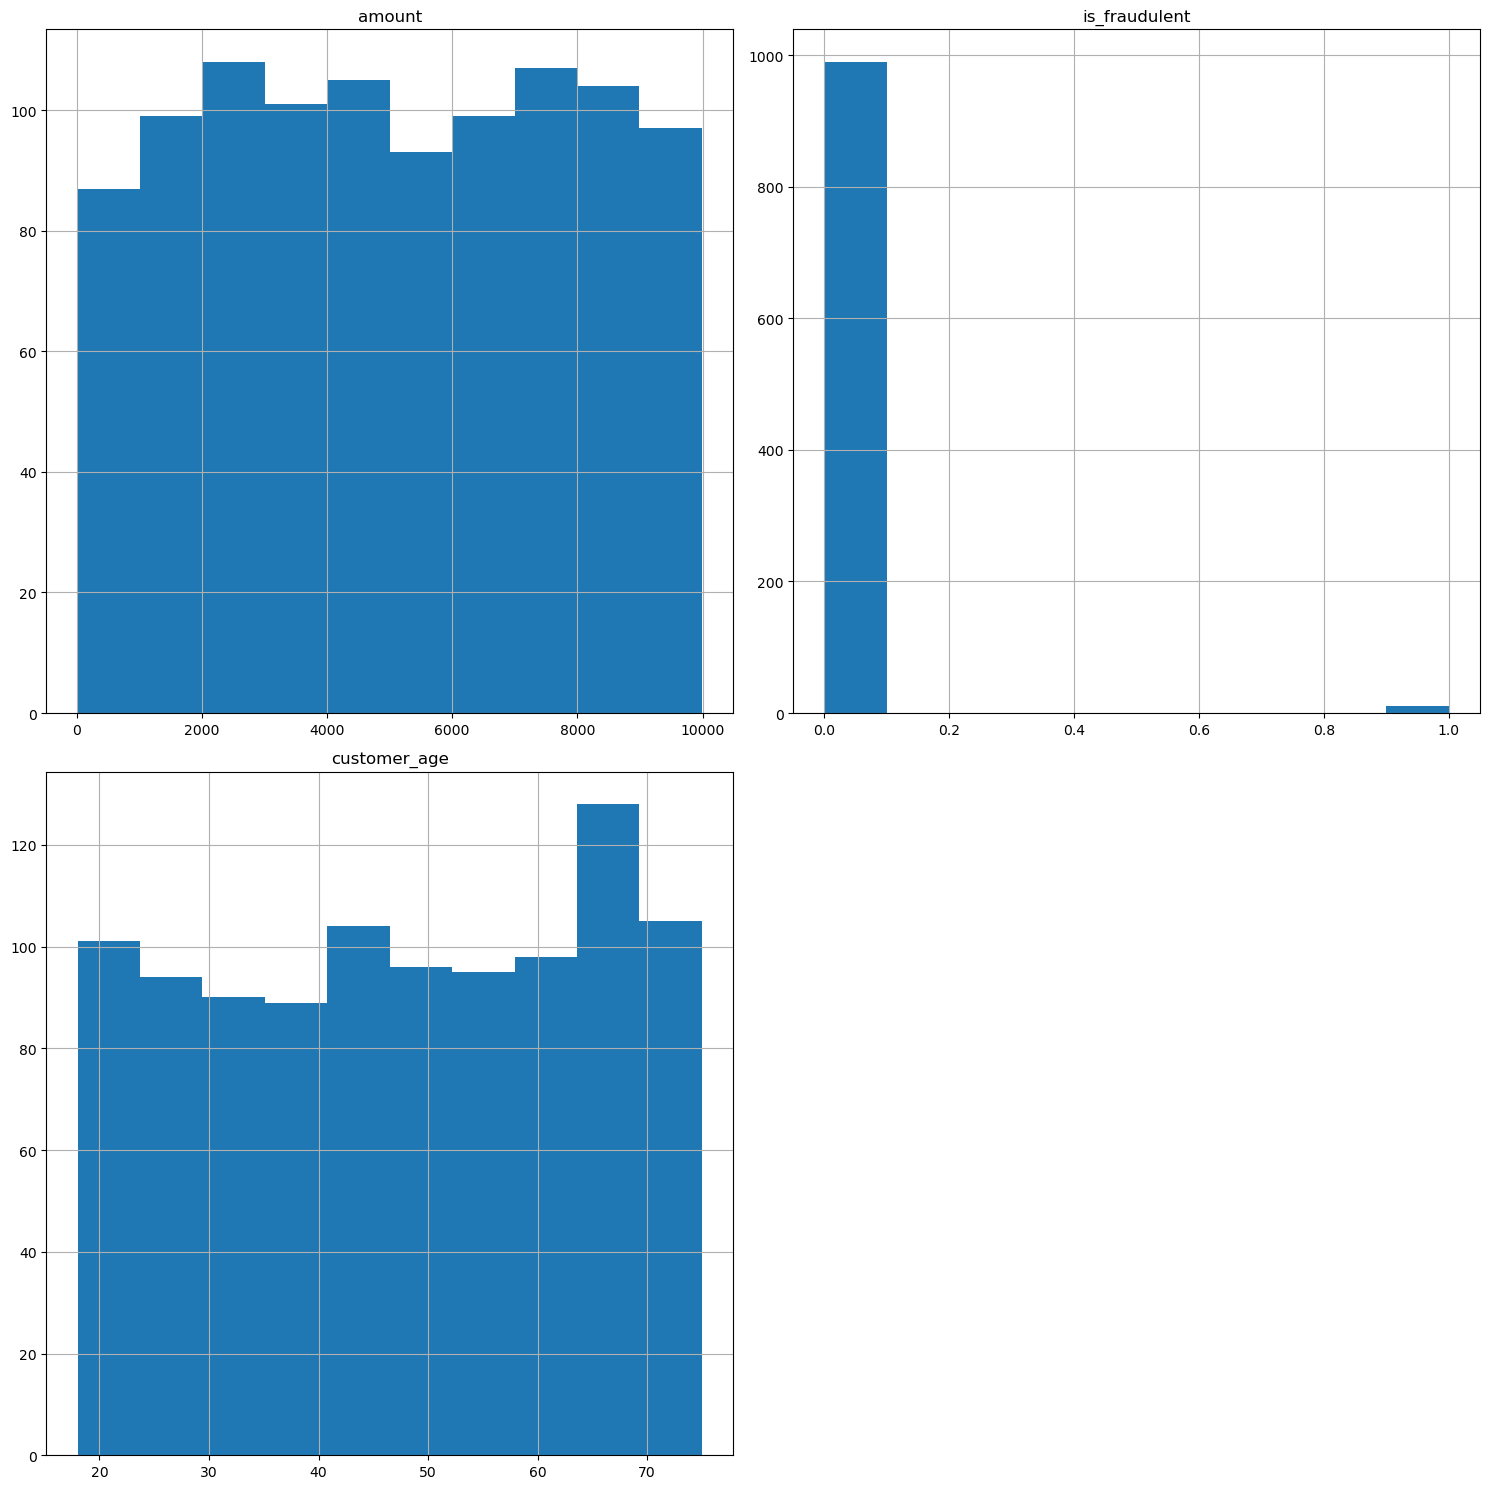

In [1194]:
fin_data.hist(figsize=(15,15)) #making a histogram of different pieces of information
plt.tight_layout()
plt.show()

- Customer age & amount are basically symmetrical with very little skew. The distribution is roughly normal.
- Only two options for is_fraudulent, this dataset is ripe for a binary classification model like logistic regression, decision trees, or random forest.
- Lastly fraud rates are very low, which gets back to the <b> class imbalance </b> I spoke about earlier.

  Let's compare if there's trends between age and likelihood of fraud.

        


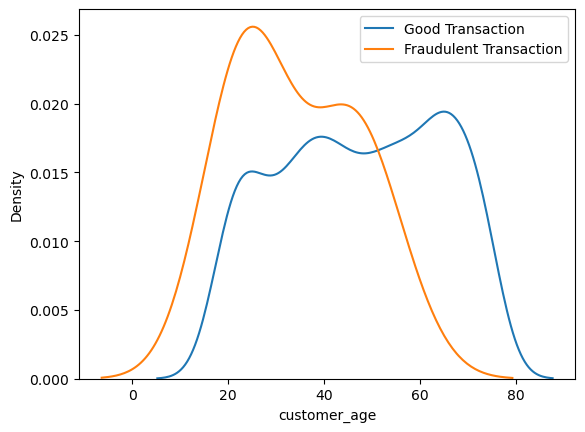

In [1196]:
#plotting density estimations between good and bad transactions by customer age. 
sns.kdeplot(fin_data.loc[fin_data['is_fraudulent']==0, 'customer_age'], label = 'Good Transaction') 
sns.kdeplot(fin_data.loc[fin_data['is_fraudulent']==1, 'customer_age'], label = 'Fraudulent Transaction')

plt.legend()
plt.show()

<h3><b> Understanding Graph </b></h3>
I am using Kernal density estimation (KDE) to visualize the distribution of customer ages in two categories: Good vs. Fradulent transactions.
Fraud rates are higher with younger people until roughly age 50. After age 50, older people aren't very suspectible to fraud.


<h3><b> Customer Behavior </b></h3>


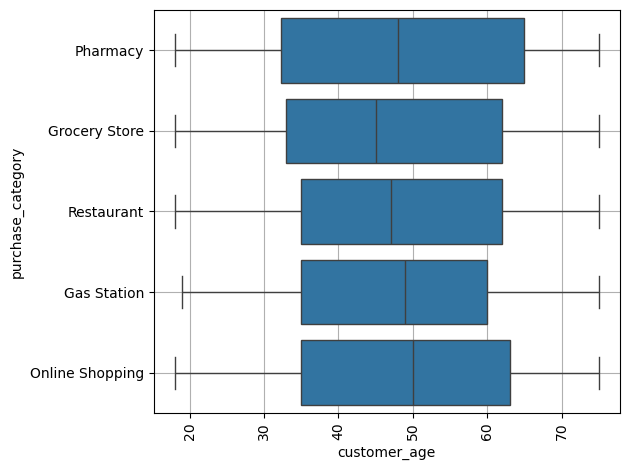

In [1200]:
bp = sns.boxplot(y=fin_data['purchase_category'],x=fin_data['customer_age']) #I am making a boxplot among the ages and purhcase category
plt.setp(bp.get_xticklabels(), rotation=90)

plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

The median person who shops online, goes to the gas station, or pharmacy is older, while the median person who goes to a restaurant or groceries is younger.

I would expect online shoppers to skew younger!

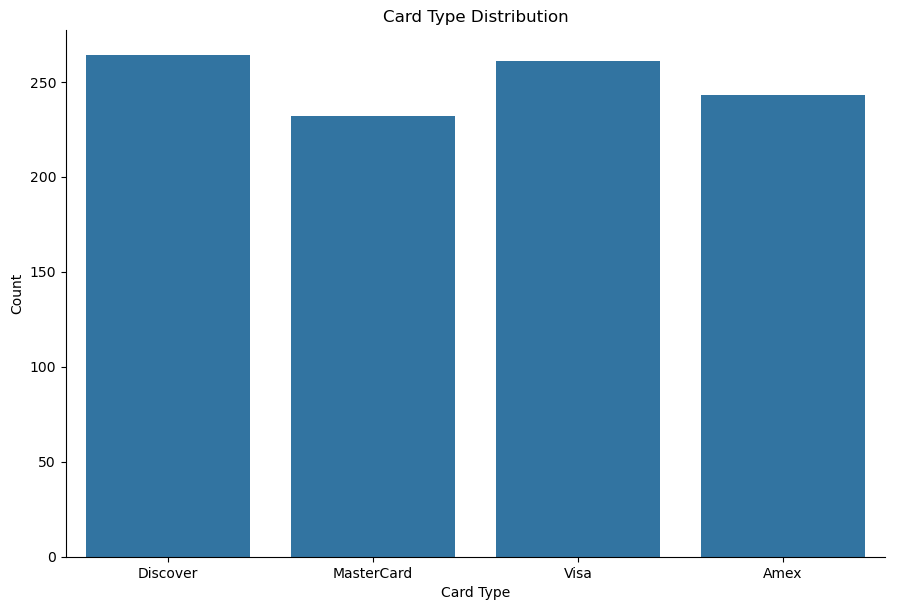

In [1202]:
#making a barchart on the distribution of trasnactions among different cards
bp = sns.catplot(data = fin_data, x = 'card_type', kind = 'count', height = 6, aspect = 1.5)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Type Distribution')
plt.show()

More Discover transactions than any other card, and mastercard has the lowest amount

Now we will look at where these transactions are located:

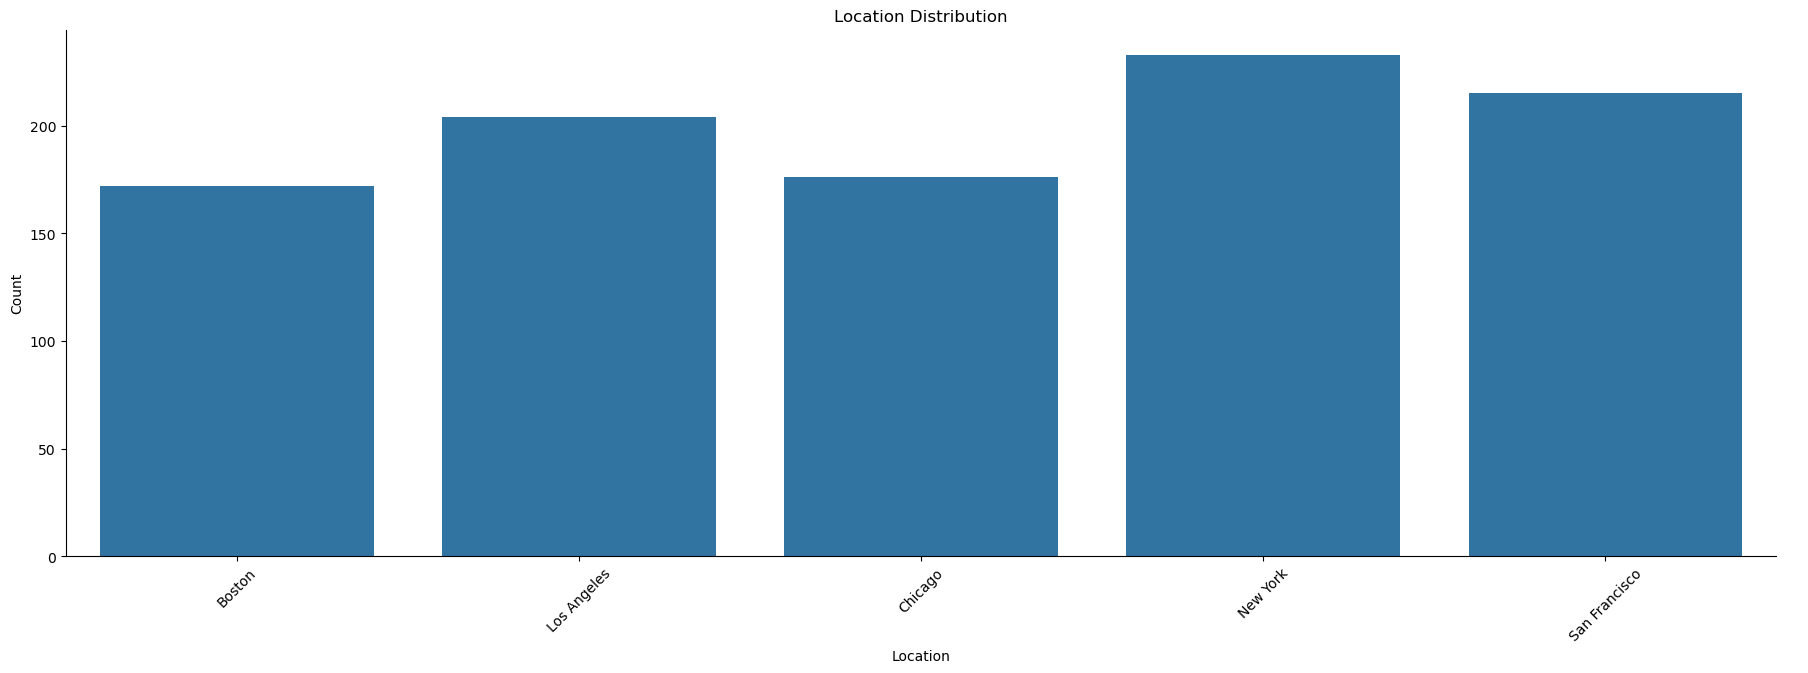

In [1204]:
sns.catplot(data=fin_data,x='location',kind='count',height=6,aspect=3) #plot on location distribution
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.xticks(rotation=45)
plt.show()

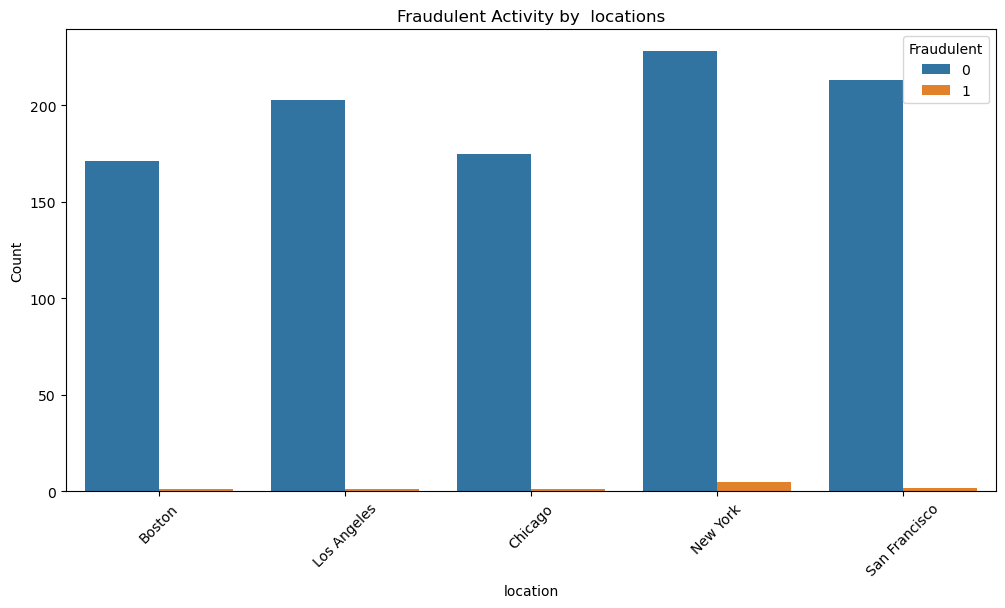

In [1205]:
#time to see areas with most fraud
fraud_spots = fin_data[fin_data['is_fraudulent'] == 1]['location'].value_counts().nlargest(10).index.sort_values(ascending=True)

plt.figure(figsize=(12,6))
sns.countplot(data=fin_data[fin_data['location'].isin(fraud_spots)], x='location', hue='is_fraudulent')
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Fraudulent Activity by  locations')
plt.legend(title='Fraudulent',loc='upper right')
plt.xticks(rotation=45)
plt.show()


<h2><b> Data Pre-processing </b></h3>
<h3><b> Date conversion </b></h3>



We need to convert the dates into a date time format

In [1208]:
fin_data

,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age
0,7120.42,2023-05-22 00:12:00,0,Discover,Boston,Pharmacy,24
1,6912.25,2023-04-26 19:18:00,0,MasterCard,Los Angeles,Pharmacy,64
2,7184.92,2023-11-15 04:58:00,0,MasterCard,Chicago,Grocery Store,39
3,4170.23,2023-10-08 11:40:00,0,Visa,Los Angeles,Restaurant,58
4,1413.39,2023-12-10 22:07:00,0,Discover,Chicago,Gas Station,21
...,...,...,...,...,...,...,...
995,2946.16,2023-10-10 15:56:00,0,Discover,Boston,Pharmacy,54
996,424.77,2023-08-19 04:57:00,0,Discover,Chicago,Pharmacy,40
997,2378.60,2023-11-14 03:20:00,0,Discover,Boston,Restaurant,67
998,2844.82,2023-07-17 14:52:00,0,Visa,Los Angeles,Online Shopping,58


In [1209]:
fin_data['transaction_time'] = pd.to_datetime(fin_data['transaction_time'])

In [1210]:
fin_data['transaction_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: transaction_time
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


<h3><b> One hot Encoding </b></h3>

The one hot encoding technique is used to convert categorical variables into a numerical format that can be used in an ML algo. So I am transforming categorical data (like "card_type" or "location") into a numerical format. Same with purchase type and transaction time

In [1213]:
fin_data_two = pd.get_dummies(fin_data, columns=['card_type', 'purchase_category', 'location'],#creating dummy names for the new numerical categories 
                              prefix=['Card', 'purchase_type', 'Loc'])

fin_data_two['transaction_time'] = fin_data_two["transaction_time"].astype("int64") #converting transaction time into an integer

In [1214]:
fin_data_two

,amount,transaction_time,is_fraudulent,customer_age,Card_Amex,Card_Discover,Card_MasterCard,Card_Visa,purchase_type_Gas Station,purchase_type_Grocery Store,purchase_type_Online Shopping,purchase_type_Pharmacy,purchase_type_Restaurant,Loc_Boston,Loc_Chicago,Loc_Los Angeles,Loc_New York,Loc_San Francisco
0,7120.42,1684714320000000000,0,24,False,True,False,False,False,False,False,True,False,True,False,False,False,False
1,6912.25,1682536680000000000,0,64,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,7184.92,1700024280000000000,0,39,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,4170.23,1696765200000000000,0,58,False,False,False,True,False,False,False,False,True,False,False,True,False,False
4,1413.39,1702246020000000000,0,21,False,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2946.16,1696953360000000000,0,54,False,True,False,False,False,False,False,True,False,True,False,False,False,False
996,424.77,1692421020000000000,0,40,False,True,False,False,False,False,False,True,False,False,True,False,False,False
997,2378.60,1699932000000000000,0,67,False,True,False,False,False,False,False,False,True,True,False,False,False,False
998,2844.82,1689605520000000000,0,58,False,False,False,True,False,False,True,False,False,False,False,True,False,False


<h3><b> Seeing Correlation Coefficients between is_fraudulent and the other variables  </b></h3>

<Axes: >

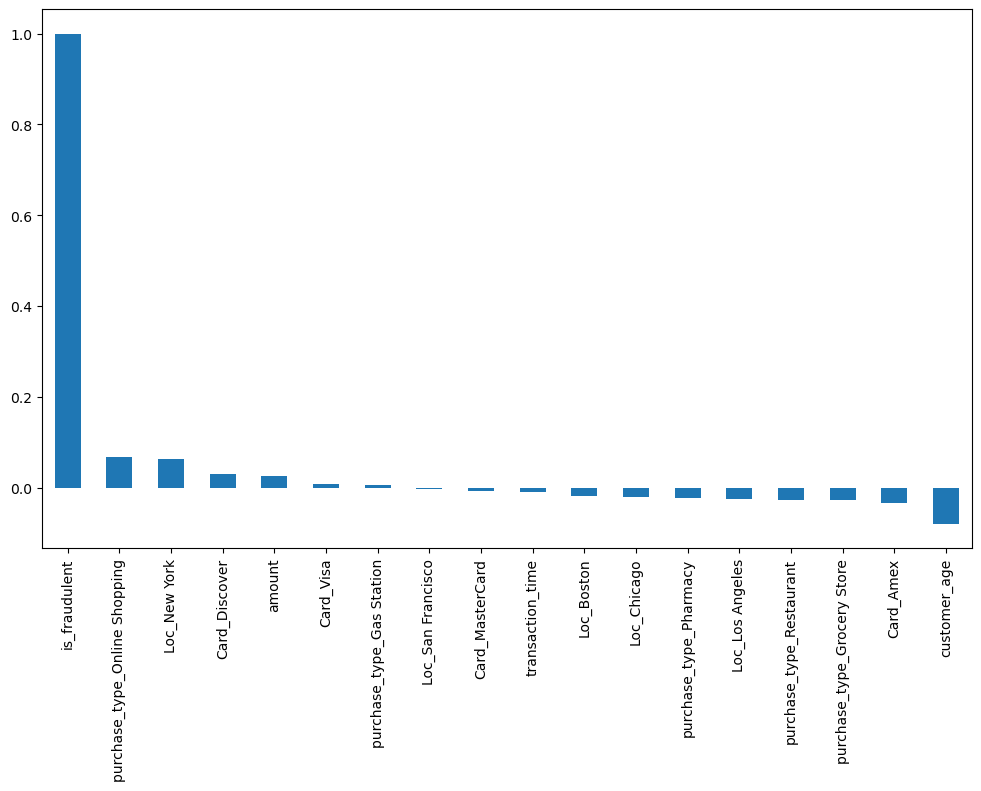

In [1216]:
#different weights by category
plt.figure(figsize=(12,7))

correlations = fin_data_two.corr()

correlations['is_fraudulent'].sort_values(ascending=False).plot(kind='bar')

Online shopping, living in New York and discover cards have the strognest positive weights associated with fradulent transactions

customer age, american express, and shopping at a grocery store have the strongest negative weights with fraud.

In [1218]:
fin_data_two = fin_data_two.drop('transaction_time', axis=1) #dropping transaction_time, having the specific date time isn't needed to help predict fraud


<h1><b> ML Models </b></h1>
<h2> Logistic Regression: High Accuracy & Recall, but low precision </h2>

In [1220]:
# Step 1: Make the X variables and the Y variable
X = fin_data_two.drop(columns=['is_fraudulent'])  # Features (everything except the target)
y = fin_data_two['is_fraudulent']  # Target variable



In [1221]:
# Step 2: Split the data into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

#with the stratify=y, I make sure I have the same distriubtion of fraud/not fraud transactions in each training/test set



In [1222]:
#scaling data to normalize which is needed for logistic regression
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(fin_data_two)
norm_df = pd.DataFrame(norm,columns=fin_data_two.columns)

Because of the class imbalance between the # of fraudulent transactions and good transactions. I will be using the 
SMOTE (Synethetic Minority Over-sampling Technique) which makes artifical samples of the minority class (fraudulent transactions are only 1% of the data) to balance the dataset. This addresses the imbalance.

In [1224]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_X_train , smote_Y_train = oversampler.fit_resample(X_train,y_train)

In [1225]:
model = LogisticRegression() #make the logistic regression


In [1226]:
model.fit(smote_X_train, smote_Y_train) #make the model fit to the training data

LogisticRegression()

In [1227]:
x_train_prediction = model.predict(smote_X_train) #time to test how well it does on the training set
traning_data_accuracy = accuracy_score(x_train_prediction, smote_Y_train)

In [1228]:
print('Accuracy on Traning Data : ', traning_data_accuracy)

Accuracy on Traning Data :  0.9715909090909091


In [1229]:
X_test_prediction = model.predict(X_test) #now we will see how the model does on the test set
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test Data : ', test_data_accuracy)


Accuracy on Test Data :  0.935


In [1230]:
y_test_prediction = model.predict(X_test)

# Make classification report
report = classification_report(y_test, y_test_prediction, target_names=['Not Fraudulent', 'Fraudulent'])
print(report)


                precision    recall  f1-score   support

Not Fraudulent       0.99      0.94      0.97       198
    Fraudulent       0.08      0.50      0.13         2

      accuracy                           0.94       200
     macro avg       0.54      0.72      0.55       200
  weighted avg       0.99      0.94      0.96       200



<h2> Decision Tree: 96% Accuracy, but 0% Precision or Recall </h2>

In [1232]:
# Make and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [1233]:
# Step 4: Make predictions
y_pred = clf.predict(X_test)



In [1234]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9600


In [1235]:
# Print a report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.00      0.00      0.00         2

    accuracy                           0.96       200
   macro avg       0.49      0.48      0.49       200
weighted avg       0.98      0.96      0.97       200



I am going to iterate on this decision tree because a tree can most likely do better than a 0% precision and recall

In [1237]:
from sklearn import tree
import matplotlib.pyplot as plt



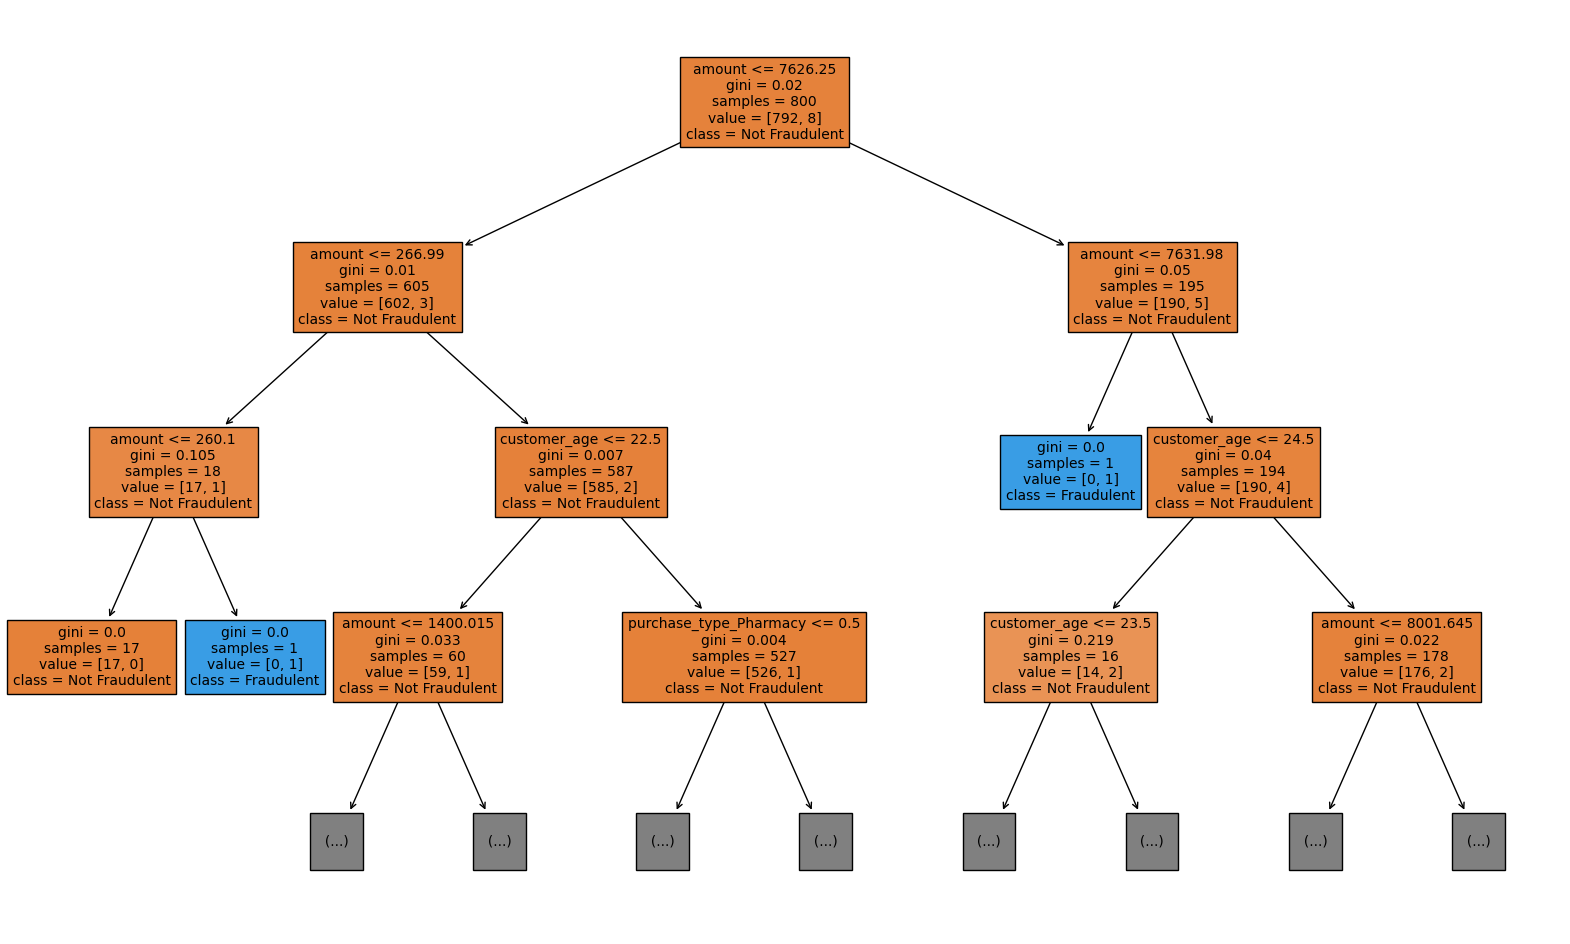

In [1238]:
plt.figure(figsize=(20, 12)) #I want to visiualize the tree
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Fraudulent', 'Fraudulent'],fontsize=10, max_depth=3 )
plt.show()

The Decicion tree performed worse than the Logistic Regression, 96% accuracy
But in reality the decision tree isn't performing well for fraud because its discrement capabilities are poor.

When you look at the tree, there's many branches for the good transaction/non-fraud class (the majority class), but there are very few branches for the fraud class (minirity class), this shows that the model is biased towards the majority which explains the poor recall & precision for the fraud class.

The model also has shallow depths for the tree and that the fraud boxes are very small in sample size. Thus this shows underfitting. The tree isn't capturing enough complexity in fraud transactions which explains why it isn't detecting the fraud (low recall).

Also the features (amount, customer age, and etc.) are not helping the model find the right patterns to find a fraud transaction.


<h3> Changing the settings to Improve the Tree - Hyperparameter Tuning </h3>

One parameter I could change is the <b>max depth of the trees. (max_depth) </b>

Deeper trees means I am trying to capting more deta; ilthe trade off is I am capturing noise and leads to overfitting on the test data -meaning terrible inference capabilities
Shorter trees means I am capturing less detail, trying to capture generalities, which can lead to betteer inference capabilities on the test data

The second paramter I can change is the <b> min_samples_split </b> 

This technique specifies the minimum number of samples needed to split another branch from a tree.

Increasing min_samples split will make the tree more conservative about splitting. It won't make new branches unless there are at least the min number of samples in the node. More minimum sample requirements prevent overfitting because you prevent the tree from modeling and making branches off very small samples which can have overfitting or outliers. But more minimum requirements means a chance to underfit.

If I decrease the minimum sample, it means the tree will classify (make new branches) off fewer samples, which could lead to a more complex tree to classify nuances and lead to captiure noise --> overfitting.

The third parameter I can change is the <b> min_samples_leaf </b>

Having fewer samples on a leaf, means a highly complex model capturing many different classifications, which can grab complexity but also overfit onoise in the n test da.tH
having more samples on a leaf, leads to a more simple model capturing fewer complexity and more generality, which could underfit test data.

I can basically "trial and error" by using cross-valdiation & GridSearch by trying different combos of hyperparamters (tree_depths, minimum samples to split a tree, and minimal samples on a leaf) to see which gives the best combo on training and testing performance.ns

For this Cross-validation it trains on X number of training splits, and then tests on the final one.
Grid search finds the best model for the training data, and then I use that model for inference on the test data.

In [1242]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balance',None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1')

# Train the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.13333333333333333


In [1243]:
# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_dt = best_model.predict(X_test)


# Print detailed classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       198
           1       0.00      0.00      0.00         2

    accuracy                           0.97       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.98      0.97      0.97       200



Even with hypertuning the decision tree, the discertment capability of the tree is weak compared to the logistic regression.

I'll try a random forest next, which will have multiple trees, making the mdoel learn via ensemble learning.

<h2> Random Forest - Multiple Decision Trees: Precision:0%  & Recall:0%  </h2>

In [1246]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [1247]:
rfc = RandomForestClassifier(max_depth=11, random_state=42)
# i wanted to test with a general model, so I made trees 11 (a deeper tree might capture too much detail and noise, that has poor inference capabilities


In [1248]:
rfc = rfc.fit(smote_X_train,smote_Y_train) #fit model for training data

In [1249]:
train_accuracy = rfc.score(smote_X_train, smote_Y_train) #see the accuracy on training data
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 1.0000


In [1250]:
test_accuracy = rfc.score(x_test, y_test)
print(f"Test Accuracy with max_depth=11: {test_accuracy:.4f}") 

Test Accuracy with max_depth=11: 1.0000


In [1251]:
y_test_prediction_rf = rfc.predict(X_test)

report_rf = classification_report(y_test, y_test_prediction_rf, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_rf)

                precision    recall  f1-score   support

Not Fraudulent       0.99      1.00      1.00       199
    Fraudulent       0.00      0.00      0.00         1

      accuracy                           0.99       200
     macro avg       0.50      0.50      0.50       200
  weighted avg       0.99      0.99      0.99       200



The recall and precision remained low with the random forest. So I explored additional techniques such as adding a class_weight to handle class inbalance in the dataset by giving more weight to the minority class (fraud transactions). I also increased the tree depth to 20 to increase its discernment capability to recognize more complex patterns.

In [1253]:
rfc = RandomForestClassifier(max_depth=20, random_state=42, class_weight='balanced')
rfc.fit(smote_X_train, smote_Y_train)

y_test_prediction_rf = rfc.predict(X_test)

report_rf = classification_report(y_test, y_test_prediction_rf, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_rf)

                precision    recall  f1-score   support

Not Fraudulent       0.99      1.00      1.00       199
    Fraudulent       0.00      0.00      0.00         1

      accuracy                           0.99       200
     macro avg       0.50      0.50      0.50       200
  weighted avg       0.99      0.99      0.99       200



Performance is still poor on fraud transactions. So I will trial and error more with grid search

In [1255]:
#trial and error with GridSearch

In [1256]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN


# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf':[1,2,5],
    'class_weight': [{0: 1, 1: 30}, {0: 1, 1: 50}, {0: 1, 1: 100}]
}

# GridSearchCV with precision and recall as scoring metrics
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced'),
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score, pos_label=1), 
             'recall': make_scorer(recall_score, pos_label=1)},
    refit='recall',
    cv=5
)

# Fit the grid search
grid_search.fit(smote_X_train, smote_Y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)

# Display the best recall score (or precision score)
print("Best Recall Score: ", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
print("Best Precision Score: ", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])


Best Parameters: {'class_weight': {0: 1, 1: 100}, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Recall Score:  0.9987341772151899
Best Precision Score:  0.7855024680129239


In [1257]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Predict on test data 
y_proba = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold for fraud detection 
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Make report
print(classification_report(y_test, y_pred_adjusted, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.99      0.53      0.69       199
    Fraudulent       0.00      0.00      0.00         1

      accuracy                           0.53       200
     macro avg       0.50      0.27      0.35       200
  weighted avg       0.99      0.53      0.69       200



I am not getting much traction from random forest. Gradient boost may work, as the model will learn from the errors of the previous tree, rather than random forest which makes multiple trees independently and then finalizes the prediction by a majority vote

<h2> Gradient Boost: 98.9% Precision and 99.7% Recall! </h2>

In [1260]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
xgb_clf = xgb.XGBClassifier(random_state=42)

In [1261]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest that will be boosted in the model, more trees means more training time & overfitting
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage - lower values slow down learning but help generalize the model, a higher learning rate speeds up training but could overfit
    'max_depth': [3, 5, 7],  # Maximum depth of trees, deeper trees capture more complex patterns
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features (columns) used per tree via random selection. 
    'gamma': [0, 1, 5],  # Minimum loss reduction, it specifies the minimum reduction required to make another split (another classification) in the tree. Higher values make the algo more conservative, lower values mean more tree splits (classification)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(smote_X_train, smote_Y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [1262]:
from sklearn.metrics import accuracy_score

# Use the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_xgb = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [1263]:
# Make and Show the report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Fraudulent', 'Fraudulent'])
print(report_xgb)


                precision    recall  f1-score   support

Not Fraudulent       1.00      1.00      1.00       199
    Fraudulent       1.00      1.00      1.00         1

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200



I'm wary about these great results for precision and recall because they seem unusually high, raising the possibility that the model may have identified the fraudulent transactions by sheer luck. To verify whether or not the gradient boosting model consistently detects fraud across different data subsets, I will perform cross-validation. This will help determine if the performance is reliable or luck.

In [1265]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


xgb_clf2 = XGBClassifier(scale_pos_weight=len(y_train)/sum(y_train == 1))

# Cross-validate using recall as the scoring metric
cv_scores = cross_val_score(xgb_clf2, smote_X_train, smote_Y_train, cv=5, scoring='f1')
precision_scores = cross_val_score(xgb_clf2, smote_X_train, smote_Y_train,  cv=5, scoring='precision')
recall_scores = cross_val_score(xgb_clf2, smote_X_train, smote_Y_train,  cv=5, scoring='recall')

print(f'Cross-validated F1-scores: {cv_scores}')
print(f'Mean F1-score: {cv_scores.mean()}')

print(f'Cross-validated Precision scores: {precision_scores}')
print(f'Mean Precision score: {precision_scores.mean()}')

print(f'Cross-validated Recall scores: {recall_scores}')
print(f'Mean Recall score: {recall_scores.mean()}')

Cross-validated F1-scores: [0.99363057 1.         0.99375    0.99065421 0.9875    ]
Mean F1-score: 0.9931069557711769
Cross-validated Precision scores: [1.         1.         0.98757764 0.98148148 0.97530864]
Mean Precision score: 0.9888735526416687
Cross-validated Recall scores: [0.98734177 1.         1.         1.         1.        ]
Mean Recall score: 0.9974683544303797


Not a fluke! Gradient Boost is the best model for fraud detection!

<h1><b> Model Comparison </h1>

In [1268]:
# Initialize a dictionary to store model performance
model_performance = {
    'Model for Fraud': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': []
}

# Function to evaluate a model and add the performance to the dictionary
def evaluate_model(model_name, y_test, y_pred):
    model_performance['Model for Fraud'].append(model_name)
    model_performance['Precision'].append(precision_score(y_test, y_pred, pos_label=1))
    model_performance['Recall'].append(recall_score(y_test, y_pred, pos_label=1))
    model_performance['F1-Score'].append(f1_score(y_test, y_pred,pos_label=1))
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))

# Logistic Regressi,pos_label=1on
log_reg = LogisticRegression(random_state=42)
log_reg.fit(smote_X_train, smote_Y_train)
y_pred_log_reg = log_reg.predict(X_test)
evaluate_model('Logistic Regression', y_test, y_pred_log_reg)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(smote_X_train, smote_Y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
evaluate_model('Decision Tree', y_test, y_pred_dt)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(smote_X_train, smote_Y_train)
y_pred_random_forest = random_forest.predict(X_test)
evaluate_model('Random Forest', y_test_prediction_rf, y_pred_random_forest)

# XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(scale_pos_weight=len(smote_Y_train)/sum(smote_Y_train == 1), random_state=42)
xgb_clf.fit(smote_X_train, smote_Y_train)
y_pred_xgb = xgb_clf.predict(X_test)
evaluate_model('XGBoost', y_test, y_pred_xgb)

# Convert the dictionary to a DataFrame
df_performance = pd.DataFrame(model_performance)

# Display the DataFrame
print(df_performance)

       Model for Fraud  Precision  Recall  F1-Score  Accuracy
0  Logistic Regression   0.111111     1.0       0.2     0.960
1        Decision Tree   0.000000     0.0       0.0     0.975
2        Random Forest   0.000000     0.0       0.0     0.995
3              XGBoost   1.000000     1.0       1.0     1.000


Gradient Boost is the best model I found for fraud detection.

<h1><b> Next Steps </h1>

### Areas for Improvement

1. **Improving Model Interpretability**  
   While the model achieved solid performance, an area for improvement is enhancing interpretability. Gradient Boosting, especially XG Boost can be difficult to interpret. As a follow up, I could explore models that balance accuracy, discernment capability, and clear insights. Maybe I could try CatBoosting or Explainable Boosting Machine (EBM) next time. A more interpretable model would enable better communication to stakeholders and confidence in decision making. 

2. **Focusing on User Experience Impact**  
   Another area for improvement is tying the model's output explicitly to user experience and business metrics. For example, I could measure how reducing fraud through more accurate predictions directly improves customer trust, churn reduction, and etc. Doing that would ensure that the ML algorithm is not just technically sound but also aligned with business or product goals.

3. **Adding Real-Time Capabilities**  
   Currently, the model is built for batch processing, as XG boost is a default batch processing model. If this was supposed to be a streaming, real time solution so the fraud team could quickly detect fraud to help bank customers, I would need a different model.Soem streamling libraries to consider include Apache Kafla.



